In [1]:
#CLIP was originally released with a PyTorch implementation
!pip install -U torch datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 13.7 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm

In [14]:
nltk.download('stopwords')
#a pre-trained unsupervised machine learning model for tokenizing text into sentences.
nltk.download('punkt')

#The averaged_perceptron_tagger is a pre-trained model that uses a machine learning algorithm called the averaged perceptron algorithm to perform POS tagging.
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#wordnet is a lexical database that provides synonyms and antonyms for words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip3 install SpeechRecognition pydub

from pydub import AudioSegment
import os
import speech_recognition as sr
r = sr.Recognizer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from datasets import load_dataset

imagenette = load_dataset(
    'frgfm/imagenette',
    'full_size',
    split='train',
    ignore_verifications=False  # set to True if seeing splits Error
)
imagenette

/usr/local/lib/python3.9/dist-packages/datasets/load.py:1744: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=all_checks' instead.
  warnings.warn(


Computing checksums: 100%|##########| 1/1 [00:07<00:00,  7.38s/it]

Generating train split:   0%|          | 0/9469 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3925 [00:00<?, ? examples/s]

Dataset imagenette downloaded and prepared to /root/.cache/huggingface/datasets/frgfm___imagenette/full_size/1.0.0/38929285b8abcae5c1305418e9d8fea5dd6b189bbbd22caba5f5537c7fa0f01f. Subsequent calls will reuse this data.


Dataset({
    features: ['image', 'label'],
    num_rows: 9469
})

In [8]:
imagenette

Dataset({
    features: ['image', 'label'],
    num_rows: 9469
})

In [9]:
imagenette.shape

(9469, 2)

In [10]:
# check labels in the dataset
labels_n=set(imagenette['label'])
labels_n

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
# labels names 
present_labels = imagenette.info.features['label'].names
present_labels

['tench',
 'English springer',
 'cassette player',
 'chain saw',
 'church',
 'French horn',
 'garbage truck',
 'gas pump',
 'golf ball',
 'parachute']

In [ ]:
# Get the list of class names
#class_names = imagenette.features['label'].names

# Print the label and corresponding class name for each label
label_dict={}
for label in labels_n:
    label_dict[label] = present_labels[int(label)]
label_dict

{0: 'tench',
 1: 'English springer',
 2: 'cassette player',
 3: 'chain saw',
 4: 'church',
 5: 'French horn',
 6: 'garbage truck',
 7: 'gas pump',
 8: 'golf ball',
 9: 'parachute'}

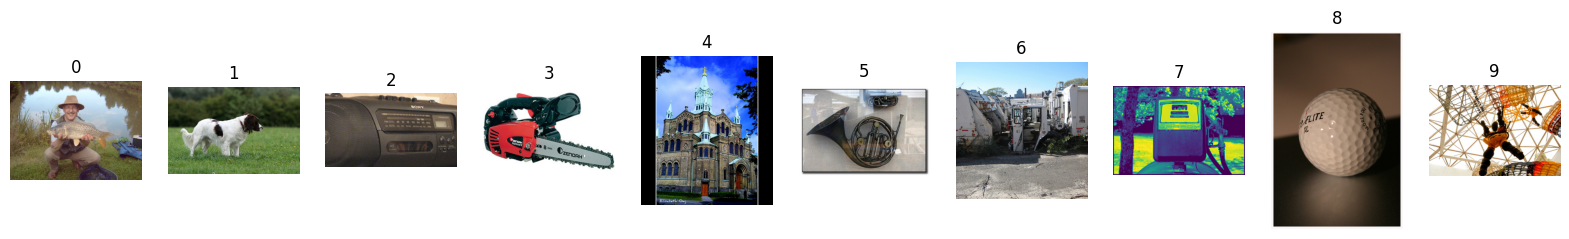

In [ ]:
# Get the list of unique labels in the dataset
#labels = set(imagenette['label'])

# Create a figure with subplots for each label
fig, axs = plt.subplots(1, len(labels_n), figsize=(20, 10))

# Loop over the labels and display one image for each label
for i, label in enumerate(labels_n):
    # Find the first image in the dataset with the current label
    image = next(x['image'] for x in imagenette if x['label'] == label)

    # Display the image in the corresponding subplot
    axs[i].imshow(image)
    axs[i].set_title(label_dict)

    axs[i].axis('off')

plt.show()


In [ ]:
import collections

# Get a list of all the class labels in the dataset
class_labels = [example['label'] for example in imagenette]

# Count the number of occurrences of each class label
class_counts = collections.Counter(class_labels)

# Print the number of images in each class
for class_label, count in class_counts.items():
    print(f"Class '{class_label}' has {count} images")


Class '2' has 993 images
Class '0' has 963 images
Class '3' has 858 images
Class '4' has 941 images
Class '9' has 960 images
Class '7' has 931 images
Class '1' has 955 images
Class '8' has 951 images
Class '6' has 961 images
Class '5' has 956 images


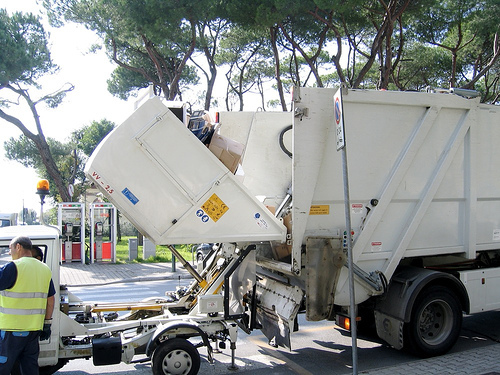

In [ ]:
imagenette[8479]['image']

In [4]:
import torch
device = "cuda" if torch.cuda.is_available() else \
         ("mps" if torch.backends.mps.is_available() else "cpu")

device

'cpu'

In [5]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

         
model_id = "openai/clip-vit-base-patch32"

# we initialize a tokenizer, image processor, and the model itself
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)

In [6]:
def summarize(text):
    # Tokenize the input text into sentences
    sentences = sent_tokenize(text)
    
    # Create a lemmatizer object
    lemmatizer = WordNetLemmatizer()

    # Define a list of stop words to be removed
    stop_words = nltk.corpus.stopwords.words("english")

    # Create an empty list to store the words
    words = []

    for sentence in sentences:
        # Tokenize the sentence into words
        sentence_words = word_tokenize(sentence)

        for word in sentence_words:
            word = word.lower()

            # If the word is a stop word, skip it
            if word in stop_words:
                continue

            # Get the part of speech tag for the word, starting letter
            pos = nltk.pos_tag([word])[0][1][0].lower()

            # Map the part of speech tag to a WordNet tag a- adjective r - adverb n - noun
            if pos in ['a', 's']:
                pos = 's'
            elif pos in ['r']:
                pos = 'r'
            else:
                pos = 'n'

            # Lemmatize the word
            lemma = lemmatizer.lemmatize(word, pos)

            # Add the lemmatized word to the list of words
            words.append(lemma)

    # Generate a frequency distribution of the words
    fdist = FreqDist(words)
    
    # Extract the most frequent words and concatenate them into a summary
    summary_words = [word for word, freq in fdist.most_common(5)]
    summary = ' '.join(summary_words)
    #print("\n ",summary)

    model_CLIP(text)
    return summary


In [ ]:
def audio(input_file):
  #input_file = "/content/Recording (2).m4a"
  #input_file=input("\n Enter the audio path : ")
# Load the input audio file
  audio_file = AudioSegment.from_file(input_file)

# Get the name of the input file without the file extension
  file_name = os.path.splitext(input_file)[0]

# Export the audio file to WAV format with the same name as the input file
#audio_file.export(file_name + ".wav", format="wav")
  filename=audio_file.export(file_name + ".wav", format="wav")

# open the file
  with sr.AudioFile(filename) as source:
      # listen for the data (load audio to memory)
      audio_data = r.record(source)
    #   recognize (convert from speech to text)
      prompt = r.recognize_google(audio_data)
      print("\n The text prompt from the Audio \n",prompt)

      model_CLIP(prompt)



 Enter any input prompt string (1) or an Audio file (2)1

 Enter the Input text :  a boy is flying over the mountain

Input in tensor representation : 
 {'input_ids': tensor([[49406,   320,  1876,   533,  4610,   962,   518,  3965, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

 Shape of vector , Text Embedding  torch.Size([1, 512])

 Shape of image embedding vector torch.Size([1, 3, 224, 224])


  0%|          | 0/32 [00:00<?, ?it/s]


 Shape of the Image Array (500, 512)

 Maximum , Minumum of image tensors before Normalizing -10.037342 4.0848145

 Maximum , Minumum of image tensors before Normalizing -0.21264137 0.2241706
 
 Top 5 matching indexes with their accuracy scores 
 [421 203  58 426 460]
421: 2.122002124786377


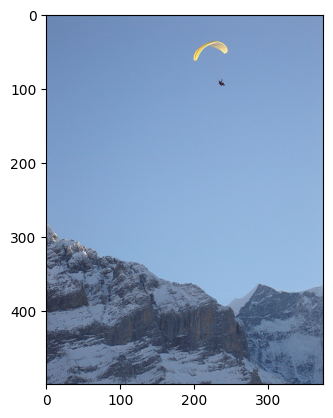

203: 2.039041519165039


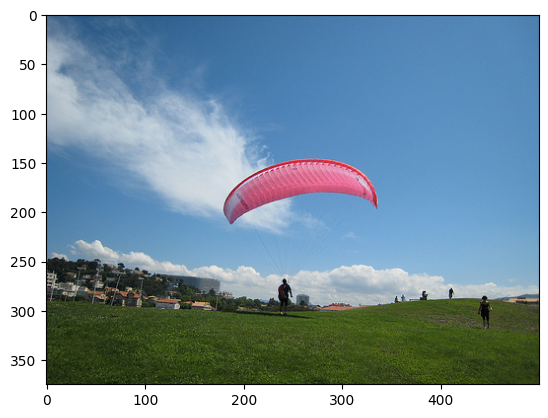

58: 1.9947335720062256


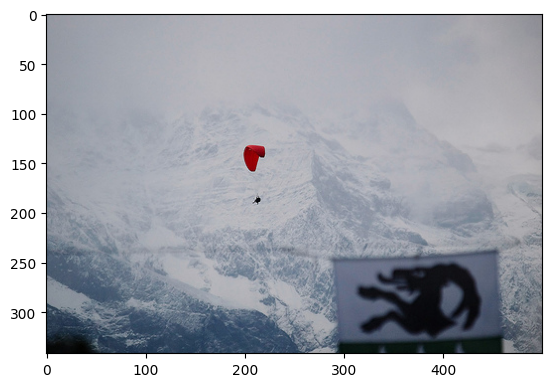

426: 1.8064367771148682


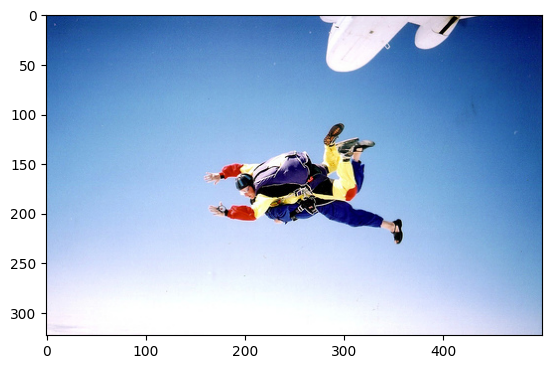

460: 1.7496919631958008


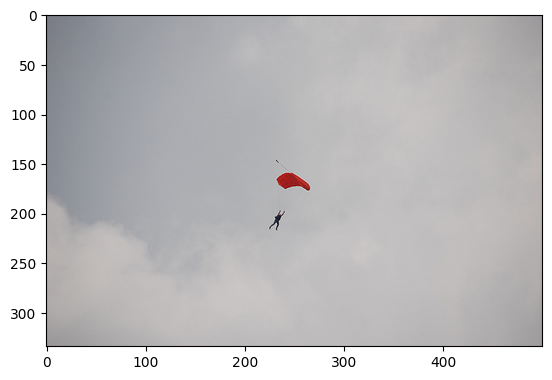

In [15]:
choice = int(input("\n Enter any input prompt string (1) or an Audio file (2)"))

if choice == 1:
  text = summarize(input("\n Enter the Input text : "))


elif choice == 2:
  prompt = audio(input("\n Enter the audio path : "))


In [12]:
def model_CLIP(prompt):
  
#prompt=summarize(text)
# create transformer-readable tokens
  inputs = tokenizer(prompt, return_tensors="pt")
  print("\nInput in tensor representation : \n",inputs)

# use CLIP to encode tokens into a meaningful embedding
  text_emb = model.get_text_features(**inputs)
# shape of text embedding 512 dimensional vector
  print("\n Shape of vector , Text Embedding ", text_emb.shape)

#image embedding 
  image = processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
    )['pixel_values'].to(device)
#vision transformer of clip 
#3 channels  224*224 image size comsumed by vision transformer of clip
  print("\n Shape of image embedding vector", image.shape)

  img_emb = model.get_image_features(image)
  np.random.seed(0)
# select 500 random image index values
  sample_idx = np.random.randint(0, len(imagenette)+1, 500).tolist()
# extract the image sample from the dataset
  images = [imagenette[i]['image'] for i in sample_idx]

  batch_size = 16
  image_arr = None

  for i in tqdm(range(0, len(images), batch_size)):
      # select batch of images
      batch = images[i:i+batch_size]
    # process and resize
      batch = processor(
        text=None,
        images=batch,
        return_tensors='pt',
        padding=True
        )['pixel_values'].to(device)
    # get image embeddings
      batch_emb = model.get_image_features(pixel_values=batch)
    # convert to numpy array
      batch_emb = batch_emb.squeeze(0)
      batch_emb = batch_emb.cpu().detach().numpy()
    # add to larger array of all image embeddings
      if image_arr is None:
          image_arr = batch_emb
      else:
          image_arr = np.concatenate((image_arr, batch_emb), axis=0)
  print("\n Shape of the Image Array", image_arr.shape)

  # min , max before normalizing
  print("\n Maximum , Minumum of image tensors before Normalizing", image_arr.min(), image_arr.max())

#normalizing image embeddings.. considers both magnitude of vector and angle,focusing on  text embedding and image embedding
  image_arr = image_arr / np.linalg.norm(image_arr, axis=0)
  print("\n Maximum , Minumum of image tensors before Normalizing", image_arr.min(), image_arr.max())

#Text Embedding
  #dot product similarity
  text_emb = text_emb.cpu().detach().numpy()
  scores = np.dot(text_emb, image_arr.T)

  top_k = 5
# get the top k indices for most similar vecs
  idx = np.argsort(-scores[0])[:top_k]
  print(" \n Top 5 matching indexes with their accuracy scores \n",idx)#indexes of images that are more similare to image embeddings

# display the results
  for i in idx:
      print(f"{i}: {scores[0][i]}")
      plt.imshow(images[i], cmap='gray')
      plt.show()






In [ ]:
prompt ="She made a noise  by playing  in cassette player"


Input in tensor representation : 
 {'input_ids': tensor([[49406,  1043,  1105,   320,  9307,   530, 19717,  2477,   638,  1629,
           320,  3461,  9607,   530, 19717,  2477, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

 Shape of vector , Text Embedding  torch.Size([1, 512])

 Shape of image embedding vector torch.Size([1, 3, 224, 224])


  0%|          | 0/32 [00:00<?, ?it/s]


 Shape of the Image Array (500, 512)

 Maximum , Minumum of image tensors before Normalizing -10.037342 4.0848145

 Maximum , Minumum of image tensors before Normalizing -0.21264137 0.2241706
 
 Top 5 matching indexes with their accuracy scores 
 [256 197  27 282 341]
256: 2.2373409271240234


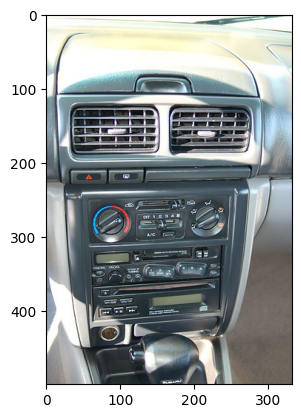

197: 2.181915760040283


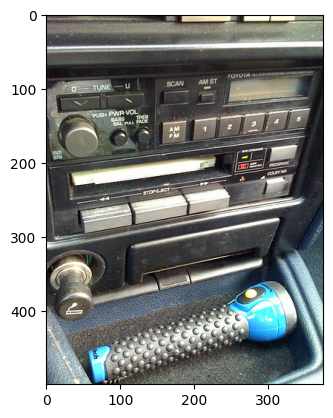

27: 2.0358898639678955


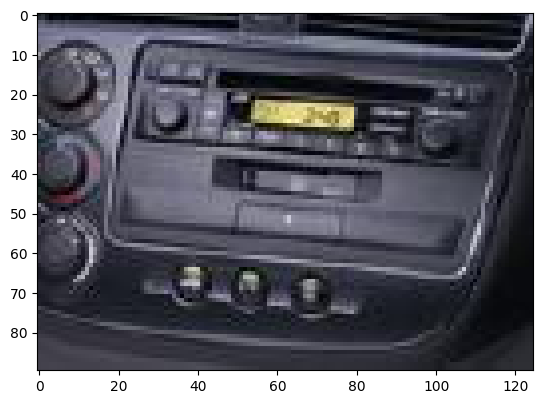

282: 2.020838737487793


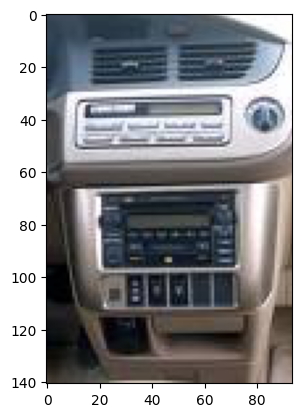

341: 2.0053181648254395


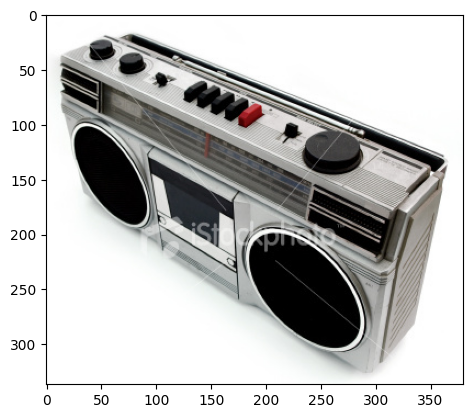

In [ ]:
model_CLIP(prompt)

In [ ]:

prompt = "a girl in the rain standing before the church"
#prompt=summarize(text)
# create transformer-readable tokens
inputs = tokenizer(prompt, return_tensors="pt")
print("Input in tensor representation : ",inputs)

# use CLIP to encode tokens into a meaningful embedding
text_emb = model.get_text_features(**inputs)
# shape of text embedding 512 dimensional vector
print("\n Shape of vector , Text Embedding ", text_emb.shape)

#image embedding 
image = processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
)['pixel_values'].to(device)
#vision transformer of clip 
#3 channels  224*224 image size comsumed by vision transformer of clip
print("\n Shape of image embedding vector", image.shape)

img_emb = model.get_image_features(image)
np.random.seed(0)
# select 500 random image index values
sample_idx = np.random.randint(0, len(imagenette)+1, 500).tolist()
# extract the image sample from the dataset
images = [imagenette[i]['image'] for i in sample_idx]



Input in tensor representation :  {'input_ids': tensor([[49406,   320,  1611,   530,   518,  2443,  2862,  1348,   518,  2735,
         49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

 Shape of vector , Text Embedding  torch.Size([1, 512])

 Shape of image embedding vector torch.Size([1, 3, 224, 224])


In [ ]:
batch_size = 16
image_arr = None

for i in tqdm(range(0, len(images), batch_size)):
    # select batch of images
    batch = images[i:i+batch_size]
    # process and resize
    batch = processor(
        text=None,
        images=batch,
        return_tensors='pt',
        padding=True
    )['pixel_values'].to(device)
    # get image embeddings
    batch_emb = model.get_image_features(pixel_values=batch)
    # convert to numpy array
    batch_emb = batch_emb.squeeze(0)
    batch_emb = batch_emb.cpu().detach().numpy()
    # add to larger array of all image embeddings
    if image_arr is None:
        image_arr = batch_emb
    else:
        image_arr = np.concatenate((image_arr, batch_emb), axis=0)
image_arr.shape



  0%|          | 0/32 [00:00<?, ?it/s]

(500, 512)

In [ ]:
# min , max before normalizing
print("\n Maximum , Minumum of image tensors before Normalizing", image_arr.min(), image_arr.max())

#normalizing image embeddings.. considers both magnitude of vector and angle,focusing on  text embedding and image embedding
image_arr = image_arr / np.linalg.norm(image_arr, axis=0)
print("\n Maximum , Minumum of image tensors before Normalizing", image_arr.min(), image_arr.max())

(-10.037341, 4.084815)

Text embedding

In [ ]:
#dot product similarity
text_emb = text_emb.cpu().detach().numpy()
scores = np.dot(text_emb, image_arr.T)

top_k = 5
# get the top k indices for most similar vecs
idx = np.argsort(-scores[0])[:top_k]
print(" \n Top 5 matching indexes ",idx)#indexes of images that are more similare to image embeddings

# display the results
for i in idx:
    print(f"{i}: {scores[0][i]}")
    plt.imshow(images[i], cmap='gray')
    plt.show()

(1, 500)

In [ ]:
!pip3 install SpeechRecognition pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 12.7 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

In [ ]:
filename="/content/offensive_2.wav"

In [ ]:
abc

<_io.BufferedRandom name='/content/Recording.wav'>

In [ ]:
# initialize the recognizer


In [ ]:
filename=abc
# open the file
with sr.AudioFile(filename) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    prompt = r.recognize_google(audio_data)
    print(prompt)

3prompt=text

yesterday I saw a garbage truck


In [ ]:
pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sounddevice SpeechRecognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
CLIP (Contrastive Language-Image Pre-training) uses a transformer-based architecture called Vision Transformer (ViT) for image embeddings and a transformer-based architecture called BERT (Bidirectional Encoder Representations from Transformers) for text embeddings.

The ViT architecture uses a transformer to process image patches and encode them into feature vectors. These feature vectors are then concatenated and passed through a feedforward neural network to generate the final image embedding.

The BERT architecture, on the other hand, is used to encode text into embeddings. It uses a transformer encoder that processes the input text tokens and generates contextualized embeddings for each token. These embeddings are then passed through a pooling layer to generate the final text embedding.

CLIP combines these two types of embeddings to map both text and images into a common latent space, which allows it to perform various downstream tasks such as image classification, text classification, and image-text retrieval.